Uber Ride Data Analysis using Python

Introduction:-

Ride-sharing services like Uber have revolutionized the way people commute. Understanding ride patterns, peak times, trip distances, and user behavior can provide valuable insights for optimizing services. This project analyzes Uber ride data obtained from Geeks for Geeks Uber Data Analysis Dataset to uncover trends, frequency patterns, and other key insights.

The primary objectives of this analysis are:

To identify trends in Uber ride usage over time.
To analyze ride frequency based on different time components (weekdays, months, time of day).
To examine the relationship between travel categories and distances.
To detect outliers in distance traveled.
To determine the most common travel purposes.
To analyze correlations between various numerical features in the dataset.

We use Python, Pandas, Seaborn, and Matplotlib to perform the analysis and create visualizations that help interpret the data effectively.

Data Preprocessing:-

Before performing the analysis, the dataset was cleaned and processed with the following steps:

Loading the dataset – The dataset was imported using Pandas.
Handling missing values – Entries with missing CATEGORY and PURPOSE were either removed or marked as "NOT SPECIFIED".
Feature Engineering:
Extracted MONTH, DAY, and WEEKDAY from START_DATE for time-based analysis.
Created a day-night column to classify rides into day and night categories.
Converted categorical variables into separate binary columns using one-hot encoding (e.g., CATEGORY_Business, CATEGORY_Personal).
Filtering Outliers: Rides with unrealistically long distances were checked and filtered where necessary.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Importing Dataset

In [85]:
dataset=pd.read_csv(r"C:\Balu\projects\python\UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


To understand the data more deeply, we need to know about the null values count, datatype, etc. So for that we will use the below code.

In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


As we understood that there are a lot of null values in PURPOSE column, so for that we will be filling the null values with a NOT keyword.

In [87]:
dataset['PURPOSE'] = dataset['PURPOSE'].fillna('NOT')


Changing the START_DATE and END_DATE to the date_time format so that further it can be use to do analysis.

In [88]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], 
                                       errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], 
                                     errors='coerce')


Splitting the START_DATE to date and time column and then converting the time into four different categories 
i.e. Morning, Afternoon, Evening, Night

In [89]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])


Once we are done with creating new columns, we can now drop rows with null values.

In [90]:
dataset.dropna(inplace=True)

It is also important to drop the duplicates rows from the dataset.

In [91]:
dataset.drop_duplicates(inplace=True)



Data Visualization

In this section, we will try to understand and compare all columns.

Let’s start with checking the unique values in dataset of the columns with object datatype.

In [92]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values


{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

Now, we will be using matplotlib and seaborn library for countplot the CATEGORY and PURPOSE columns.

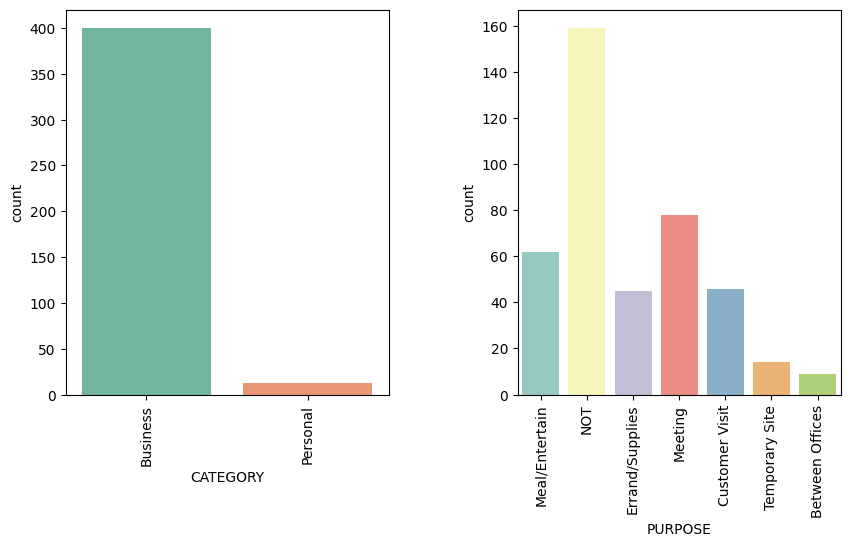

In [93]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x=dataset['CATEGORY'], palette='Set2', hue=None)  
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees

plt.subplot(1,2,2)
sns.countplot(x=dataset['PURPOSE'], palette='Set3', hue=None)  
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees

plt.subplots_adjust(wspace=0.4)  # Space between subplots


Let’s do the same for time column, here we will be using the time column which we have extracted above.

([0, 1, 2, 3],
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

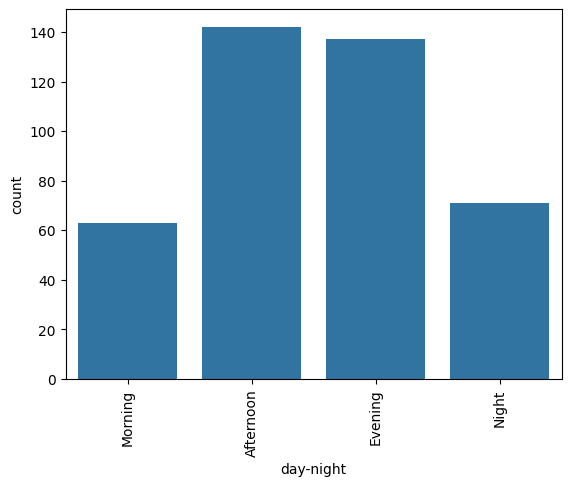

In [94]:
sns.countplot(x=dataset['day-night'])
plt.xticks(rotation=90)


Now, we will be comparing the two different categories along with the PURPOSE of the user.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices')])

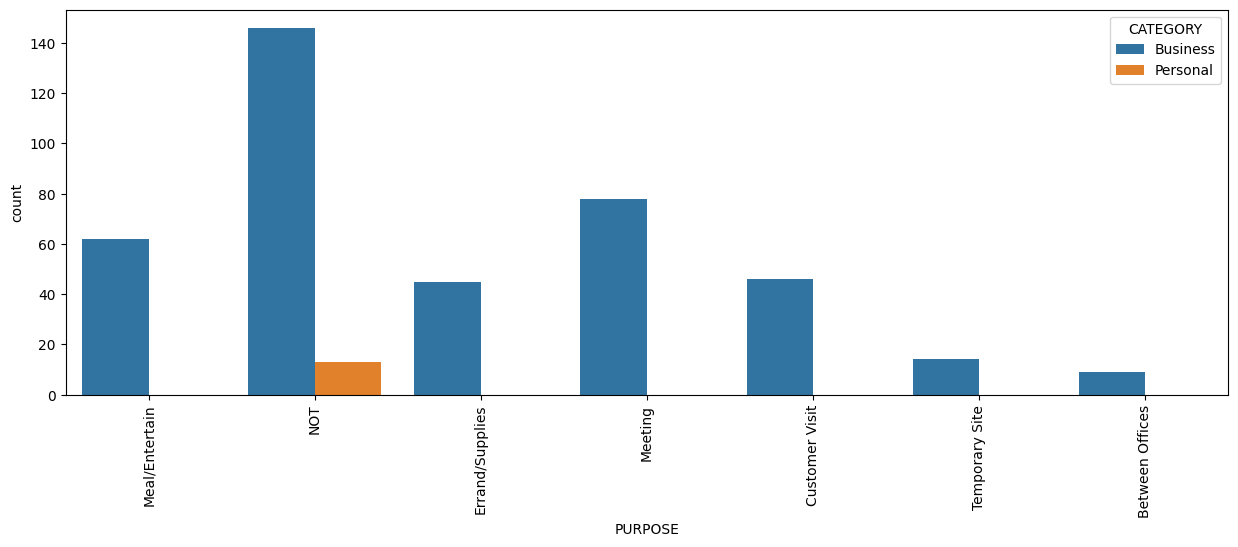

In [95]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)



Insights from the above count-plots : 
Most of the rides are booked for business purpose.
Most of the people book cabs for Meetings and Meal / Entertain purpose.
Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).

In [ ]:
!pip install scikit-learn


As we have seen that CATEGORY and PURPOSE columns are two very important columns. 
So now we will be using OneHotEncoder to categories them.

In [96]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)

# This code is modified by Susobhan Akhuli


After that, we can now find the correlation between the columns using heatmap.

<Axes: >

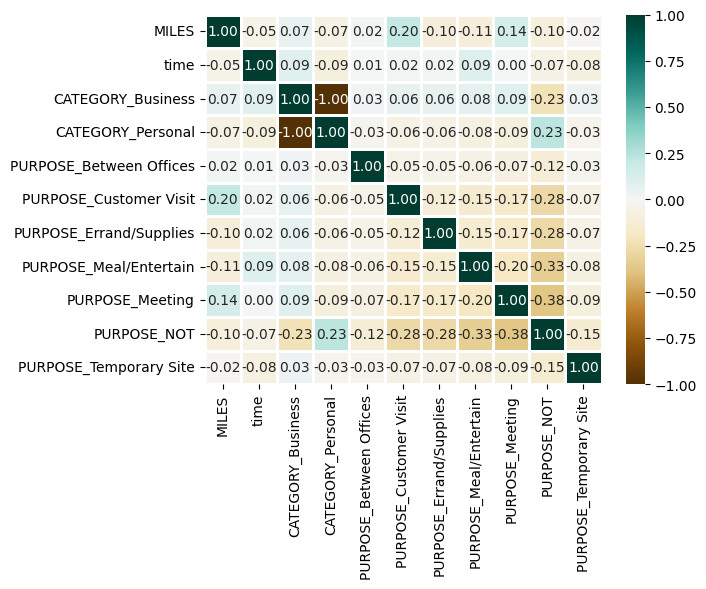

In [97]:
# Select only numerical columns for correlation calculation
numeric_dataset = dataset.select_dtypes(include=['number'])

sns.heatmap(numeric_dataset.corr(), 
            cmap='BrBG', 
            fmt='.2f', 
            linewidths=2, 
            annot=True)

# This code is modified by Susobhan Akhuli


Insights from the heatmap:
Business and Personal Category are highly negatively correlated, this have already proven earlier. So this plot, justifies the above conclusions.
There is not much correlation between the features.


Now, as we need to visualize the month data. This can we same as done before (for hours). 

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

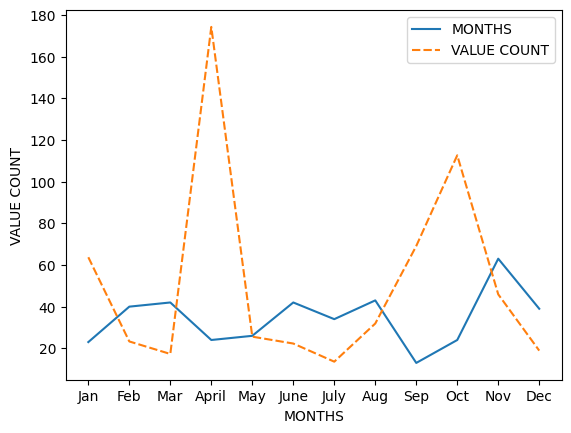

In [98]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": dataset.groupby('MONTH',
                                                  sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")


Insights from the above plot : 

The counts are very irregular.
Still its very clear that the counts are very less during Nov, Dec, Jan, which justifies the fact that  time winters are there in Florida, US.

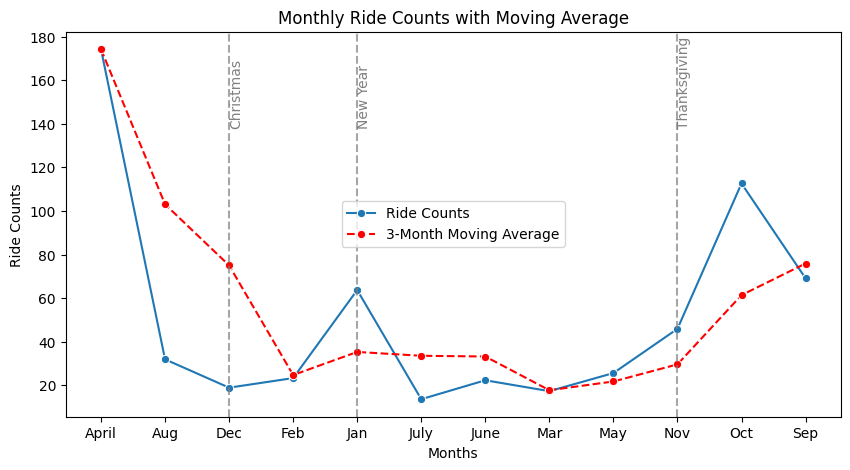

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creating the DataFrame for visualization
df = pd.DataFrame({
    "MONTHS": dataset['MONTH'].value_counts(sort=False).index,
    "VALUE COUNT": dataset.groupby('MONTH', sort=False)['MILES'].max()
})

# Sorting months in correct order
df = df.sort_values("MONTHS")

# Adding a Moving Average Column (3-month rolling)
df['MOVING AVG'] = df['VALUE COUNT'].rolling(window=3, min_periods=1).mean()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["MONTHS"], y=df["VALUE COUNT"], marker='o', label="Ride Counts")
sns.lineplot(x=df["MONTHS"], y=df["MOVING AVG"], marker='o', linestyle='dashed', label="3-Month Moving Average", color='red')

# Annotating Holidays
for month, event in [('Nov', "Thanksgiving"), ('Dec', "Christmas"), ('Jan', "New Year")]:
    plt.axvline(x=month, linestyle="--", color="gray", alpha=0.7)
    plt.text(month, df["VALUE COUNT"].max() * 0.8, event, rotation=90, color="gray")

plt.xlabel("Months")
plt.ylabel("Ride Counts")
plt.title("Monthly Ride Counts with Moving Average")
plt.legend()
plt.show()


In [100]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)


Text(0, 0.5, 'COUNT')

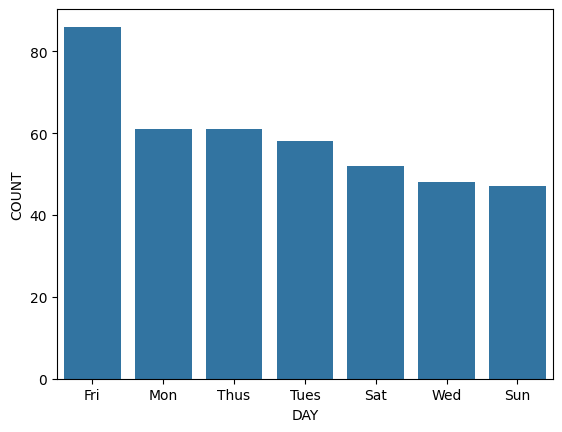

In [101]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')


 To get more clarity we can use histplot for values less than 40.

<Axes: xlabel='MILES', ylabel='Count'>

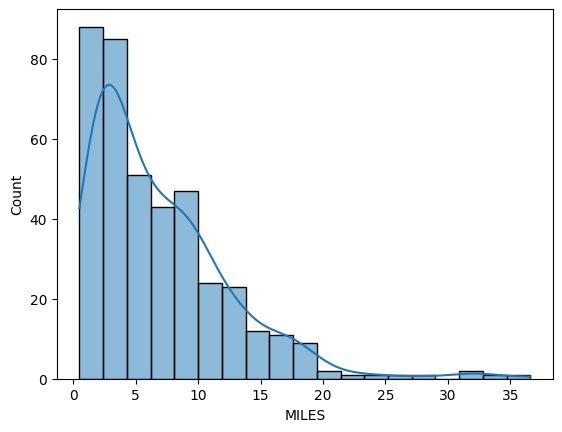

In [102]:

sns.histplot(dataset[dataset['MILES'] < 40]['MILES'], kde=True)

Insights from the above plots :

Most of the cabs booked for the distance of 4-5 miles.
Majorly people chooses cabs for the distance of 0-20 miles.
For distance more than 20 miles cab counts is nearly negligible.

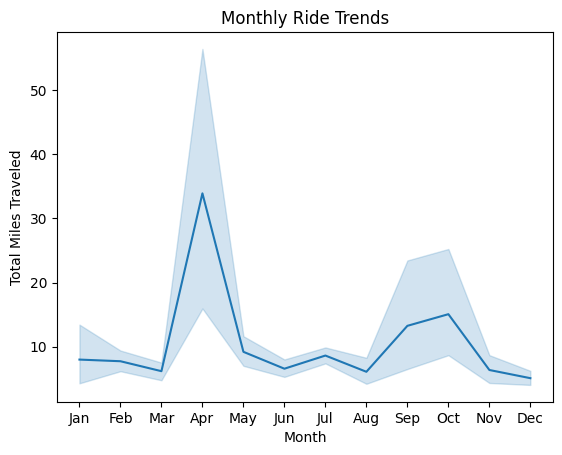

In [103]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
sns.lineplot(x=dataset['MONTH'], y=dataset['MILES'])
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Month")
plt.ylabel("Total Miles Traveled")
plt.title("Monthly Ride Trends")
plt.show()


The number of rides fluctuates throughout the year, with lower ride counts in November, December, and January, 
which aligns with the winter season in Florida, leading to reduced ride demand.

In [104]:
dataset[['CATEGORY_Business', 'CATEGORY_Personal', 'MILES']].groupby(
    ['CATEGORY_Business', 'CATEGORY_Personal']
).mean()



,,MILES
CATEGORY_Business,CATEGORY_Personal,
0.0,1.0,3.153846
1.0,0.0,9.314750


Insights from This Analysis:

Business rides tend to be longer than personal rides, possibly because they involve travel to meetings, client visits, or temporary work sites.
Personal rides are generally shorter, likely covering errands, entertainment, or commuting.
If any (1,1) cases exist, it may indicate data inconsistencies or multi-purpose rides.

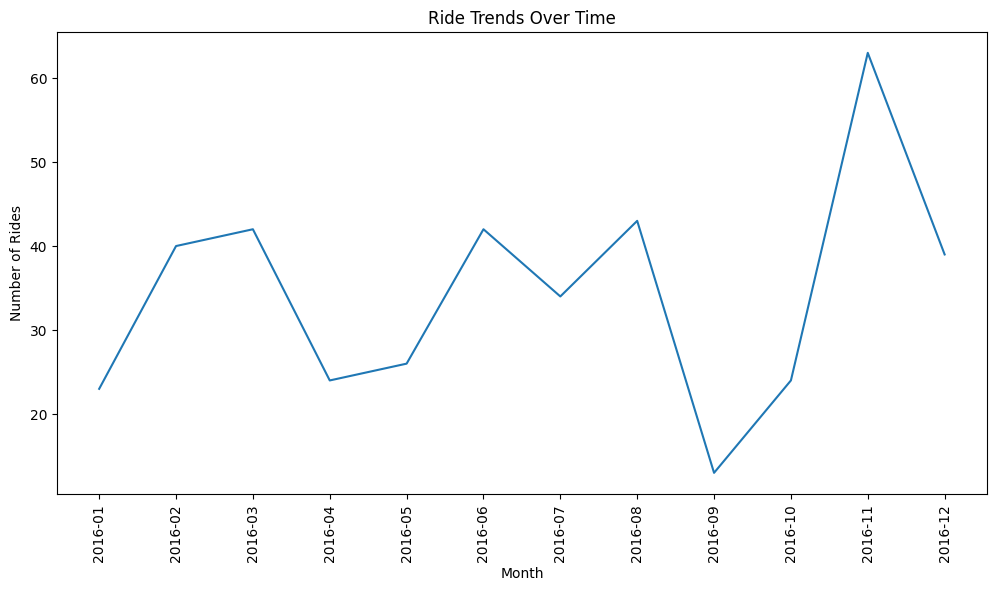

In [118]:
# 1️⃣ Ride Trends Over Time

dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'])

# Group by month or date for ride trends over time
ride_trends = dataset.groupby(dataset['START_DATE'].dt.to_period('M')).size()

# Plotting the trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=ride_trends.index.astype(str), y=ride_trends.values)
plt.title("Ride Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.xticks(rotation=90)
plt.show()



 Insight:

The number of rides fluctuates across the months, with notable dips/spikes.
There is a decrease in rides during November, December, and January, it could indicate lower travel due to winter holidays or weather conditions.
Rides increase in summer months (May–August), it might suggest higher travel activity due to vacations or business travel.

Business Impact:

Companies could adjust ride pricing or offer promotions during low-demand months.
Travel agencies or ride-sharing services can forecast demand based on past trends.

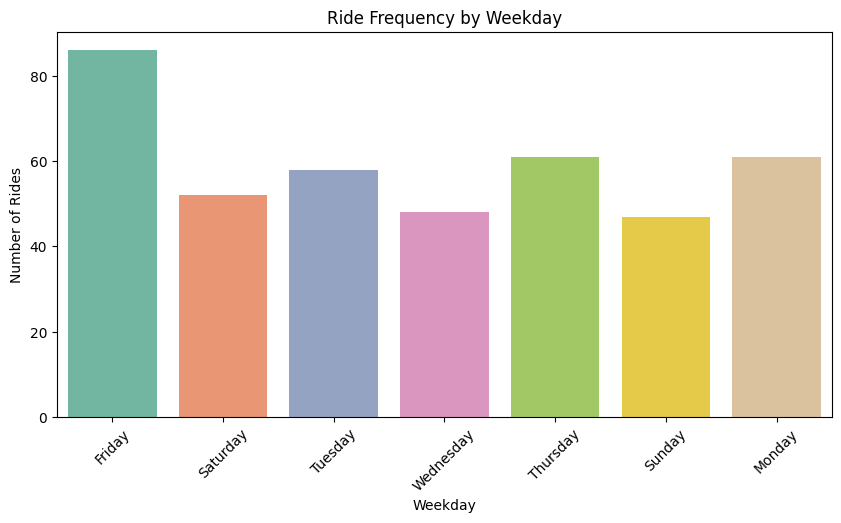

In [110]:
#2️⃣ Ride Frequency by Weekday

dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'])
dataset['WEEKDAY'] = dataset['START_DATE'].dt.day_name()  

plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='WEEKDAY', palette='Set2')
plt.title("Ride Frequency by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()


Insight:

weekdays have higher ride counts, it suggests more work-related travel.
A drop on Sundays might indicate a day of rest or reduced business operations.

Business Impact:

Rideshare companies could increase fares on high-demand weekdays.
Businesses can plan employee transport or fleet management accordingly.

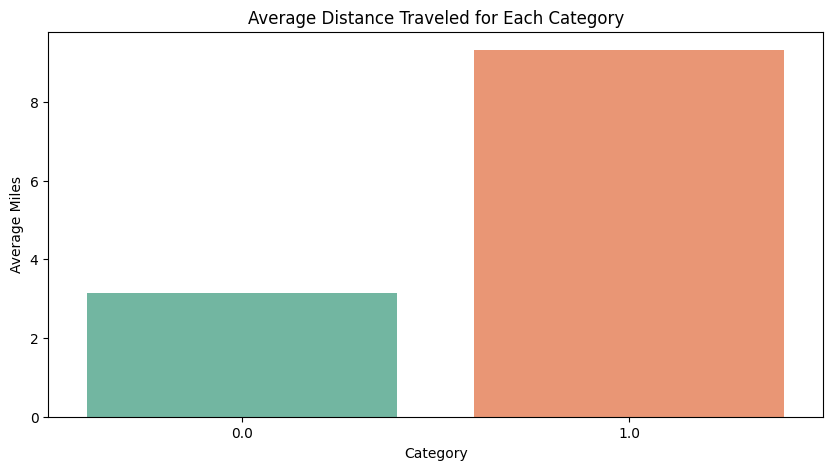

In [117]:
# 3️⃣ Average Distance Traveled for Each Category
# Calculate average distance for each category
category_avg_distance = dataset.groupby(['CATEGORY_Business', 'CATEGORY_Personal'])['MILES'].mean().reset_index()

# Plotting average distance for each category
plt.figure(figsize=(10, 5))
sns.barplot(x='CATEGORY_Business', y='MILES', data=category_avg_distance, palette='Set2')
plt.title("Average Distance Traveled for Each Category")
plt.xlabel("Category")
plt.ylabel("Average Miles")
plt.show()


Insight:

The average miles for business trips is significantly higher than for personal trips, 
it suggests that business-related travel involves long-distance commutes.


Business Impact:

Companies could optimize travel routes for business purposes.
Employees could be encouraged to use rideshare services for long-distance travel instead of company-owned vehicles.

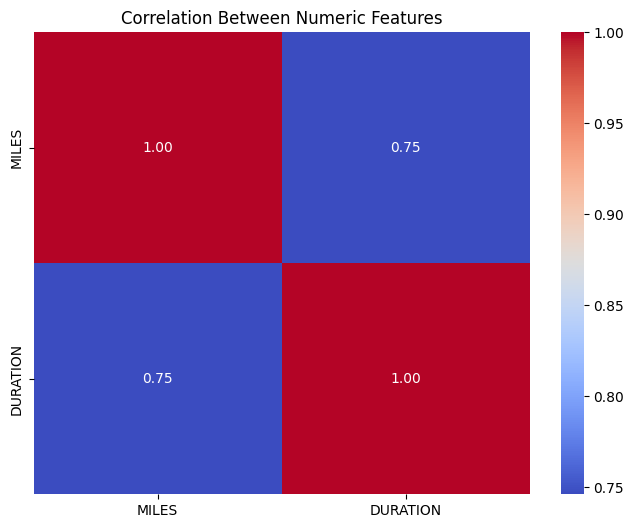

In [112]:
#4️⃣ Correlation Between Numeric Features
# Assuming you want to calculate the duration (you can also calculate it from START_DATE and END_DATE)
dataset['DURATION'] = (pd.to_datetime(dataset['END_DATE']) - pd.to_datetime(dataset['START_DATE'])).dt.total_seconds() / 60

# Correlation matrix for numeric features
correlation_matrix = dataset[['MILES', 'DURATION']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Numeric Features")
plt.show()


Insight:

Negative correlations between Business and Personal categories indicate that rides belong to distinct categories without overlap.

Business Impact:

Can help in predicting ride duration based on distance.
Companies can optimize scheduling based on ride durations.

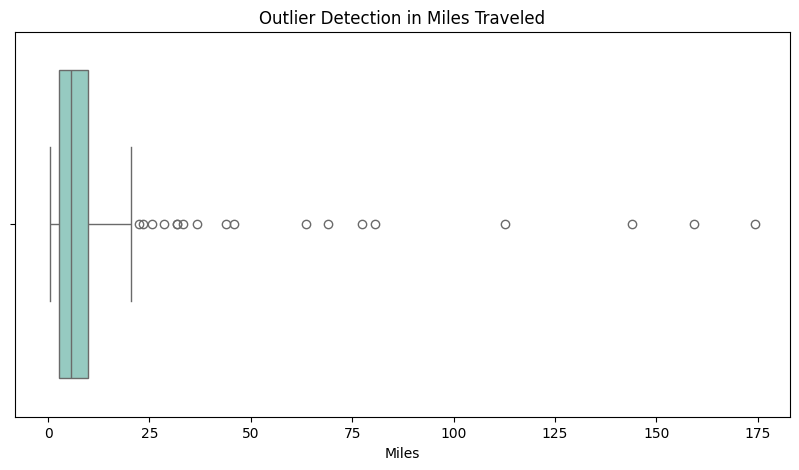

In [113]:
#5️⃣ Outlier Detection in Miles Traveled
# Boxplot for detecting outliers in miles
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='MILES', palette='Set3')
plt.title("Outlier Detection in Miles Traveled")
plt.xlabel("Miles")
plt.show()


Insight:

some rides have exceptionally high miles, they could represent long-distance business trips or airport transfers.
there are very low miles values, it could indicate short-distance errands or errors in data recording.

Business Impact:

Helps identify inefficient routes or unnecessary long trips.
Enables companies to set mileage-based ride caps for cost control.

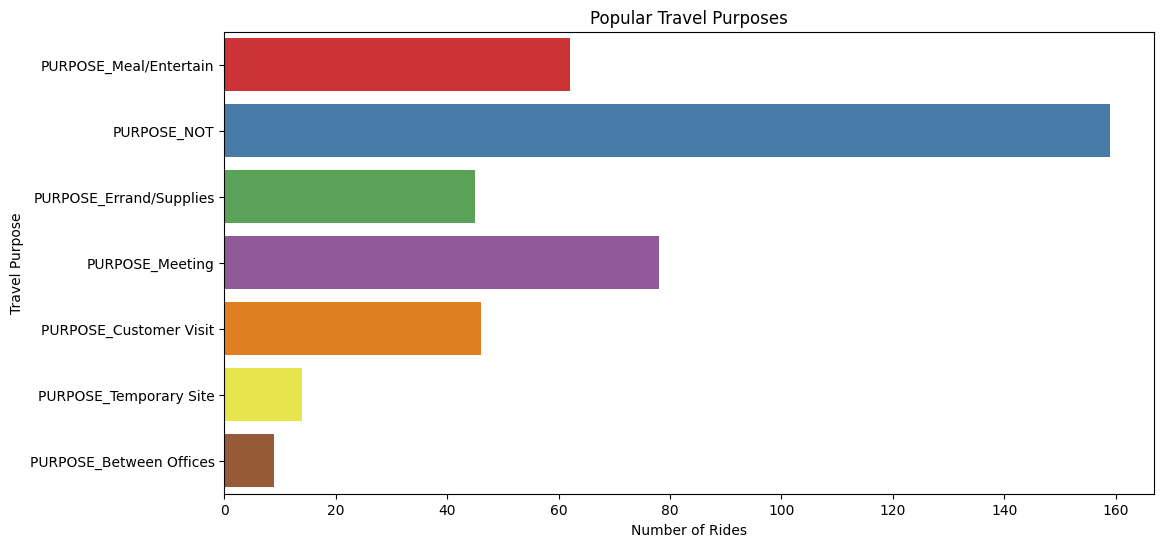

In [116]:
# 6️⃣ Popular Travel Purposes
# Creating a list of purpose columns
purpose_cols = ['PURPOSE_Between Offices', 'PURPOSE_Customer Visit', 'PURPOSE_Errand/Supplies', 
                'PURPOSE_Meal/Entertain', 'PURPOSE_Meeting', 'PURPOSE_NOT', 'PURPOSE_Temporary Site']

# Melt the dataset to combine all purpose columns into one
purpose_data = dataset[purpose_cols].apply(pd.Series.idxmax, axis=1)

# Plotting the count of each purpose
plt.figure(figsize=(12, 6))
sns.countplot(y=purpose_data, palette='Set1')
plt.title("Popular Travel Purposes")
plt.xlabel("Number of Rides")
plt.ylabel("Travel Purpose")
plt.show()


Insight:

The most frequent travel purpose (e.g., Customer Visit, Meeting, Errand/Supplies) gives insight into the primary reason for travel.
Errand/Supplies is a frequent purpose, it suggests that short-distance office errands are common.

Business Impact:

Companies can optimize logistics and supply chain travel.
Helps businesses reallocate resources based on travel purpose trends.

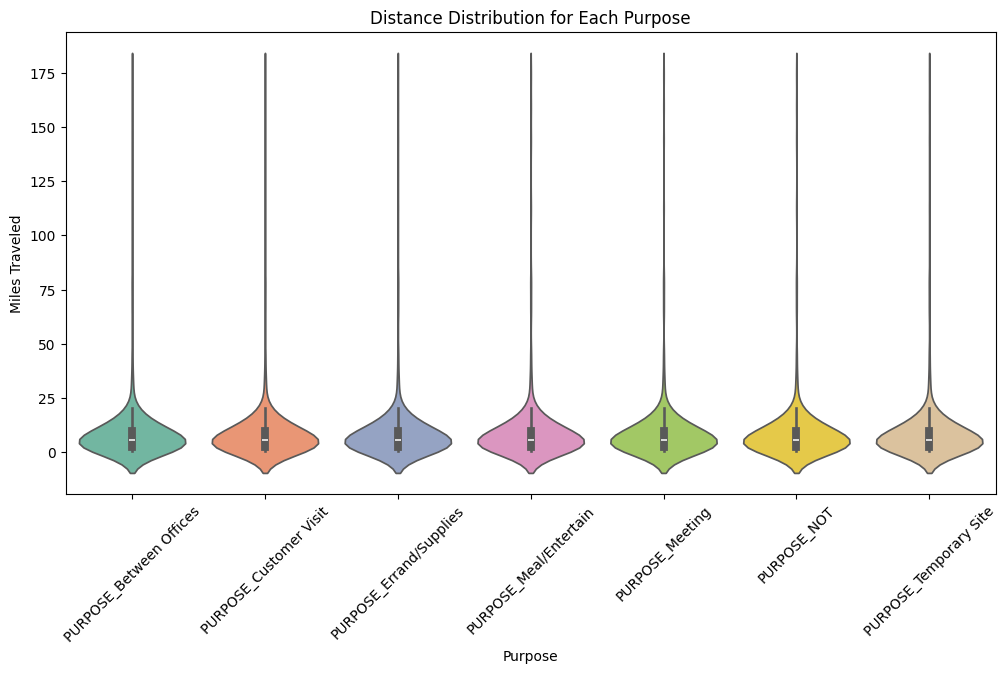

In [114]:
#7️⃣ Distance Distribution for Each Purpose
# Melt dataset for purpose columns and add miles
dataset_melted = dataset.melt(id_vars=['MILES'], value_vars=purpose_cols, var_name='PURPOSE', value_name='Purpose')

# Plotting the distribution of miles for each purpose
plt.figure(figsize=(12, 6))
sns.violinplot(x='PURPOSE', y='MILES', data=dataset_melted, palette='Set2')
plt.title("Distance Distribution for Each Purpose")
plt.xlabel("Purpose")
plt.ylabel("Miles Traveled")
plt.xticks(rotation=45)
plt.show()


Insight:

Customer Visits and Meetings have higher average miles, it suggests that employees travel far for meetings.
Errand/Supplies has low miles, these trips are typically short and local.

Business Impact:

Travel budgets can be optimized based on expected miles per trip.
Companies can encourage remote meetings if in-person visits have high travel costs.

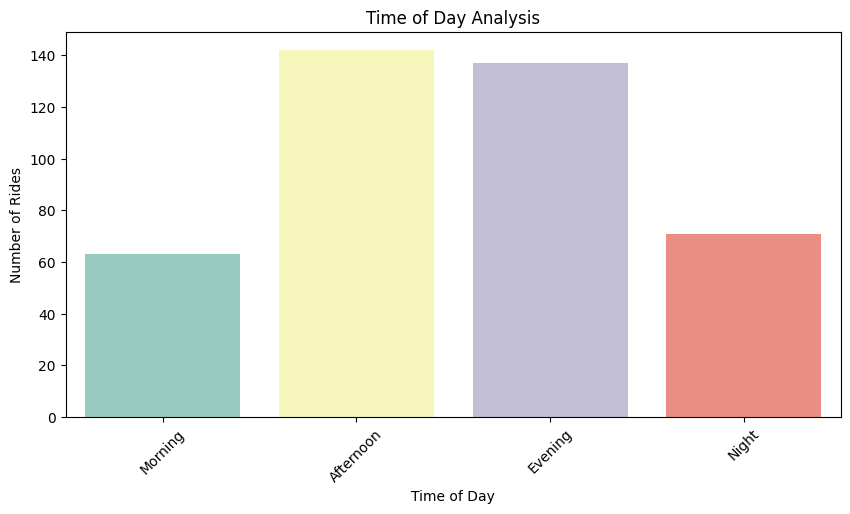

In [115]:
# 8️⃣ Time of Day Analysis
# Plotting ride distribution by time of day
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='day-night', palette='Set3')
plt.title("Time of Day Analysis")
plt.xlabel("Time of Day")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()


Insight:

Rides peak during morning and evening hours, it could indicate commuting patterns for work.
Rides increase during lunch hours (12 PM - 2 PM), employees may be using rides for meetings or meals.
Business Impact:

Companies can schedule meetings strategically to reduce unnecessary mid-day travel.
Ride-sharing services can adjust pricing during peak commute hours.
